# Monte Carlo Methods

### Last Class
- Kernel Density Functions

### Goals for Today
- Define uncertainty analysis
- Implement Monte Carlo uncertainty analysis in a mathematical model
- Apply Monte Carlo uncertainty analysis to deterministic models

### Pre-Lecture Activities

- [MATH 360 > Monte Carlo Uncertainty Analysis](http://ubcmath.github.io/MATH360/)

### Monte Carlo Uncertainty Analysis Overview

#### Preliminaries
Many of the models we have discussed or simulated require input parameters, which are often measured quantities. Measured quantities are often said to have a level of uncertainty associated with them. Even if the measurement is *perfectly* done, there still exists an uncertainty with the result (e.g., perhaps the way we are measuring the quantity is inaccurate or the tools we are using to measure have uncertainty associated with them).

For example, chemistry labs will often have a tabulated list of the lab equipment which includes the uncertainty associated with each device or in other words how "accurate" we can expect the measurement to be if it was *perfectly* done. A couple of instruments with different volumes are summarized below.

|Instrument| Volume (mL) | Uncertainty (mL)|
|----------|-------------|-----------------|
|Volumetric Flask| 100 |$\pm 0.08$ |
|                | 50 | $\pm 0.05$ |
| Burette        | 25 | $\pm 0.03$ |
|                | 20 | $\pm 0.02$ |
 
Notice here that for each of these instruments, there is a $\pm$ mL value that is associated with the measurement. This is the level of uncertainty associated with using such instruments in experiements -- so if we were using a volumetric flask to measure 100mL of solution, then our measurement is really $100 \pm 0.08$mL.   

The level of uncertainty can influence the output of any model we contruct.  We would like a method to investigate how uncertainty can affect modelling -- this is where Monte Carlo Uncertainty Analysis comes in. 

#### Uncertainty Analysis
One tactic that is generally implemented is to make multiple measurements of the same quantity.  The more times we can make measurements of a quantity the more precise we can be about the value.  One issue with this is that measuring a quantity multiple times may result in us getting a range of values for the quantity. 

Let's suppose we are measuring the distance between the HEBB and MATH buildings.  If we each take a measurement of the distance, we would find that we would end up with varying distance measurements. We could take our individual results and find the average of the values and the variance between the measurements, however, we still have a range of values for our measurement of the distance. Even if we are individually being careful with how we are taking the distance measurement, there is still some *random* error that is associated with our distance. (By random error here we mean that there will be measurements that both over- and underestimate the true value, and hence, on average will cancel out). If we were to take a lot of measurements (i.e., on the order of 100s or 1000s), we would see that the Law of Large numbers takes over, and our distribution of results will begin to look like a normal curve. *Here, it is important to note that we are only considering random errors here.  Non-random errors may lead to bias or non-normal results.*

To make multiple measurements and form a distribution of the results may not be feasible for some settings.  In some instances, it can be time consuming and/or costly to recreate measurements -- this is where Monte Carlo comes in.  We know our measurements will have some uncertainty associated with them, and we want to determine how this uncertainty affects the output of the model.  The general strategy is outlined below:
1. Assume measured quantity $x$ is normally distributed with mean $\bar{x}$ and standard deviation $\sigma$.
2. Use a random generator to obtain a value $x_{noise} = x + \varepsilon$, where $\epsilon$ is pulled from the normal distribution with mean $\bar{x}$ and standard deviation $\sigma$.
3. Solve the model with $x_{noise}$.
4. Repeat until the desired number of simulations is met. 
5. Visualize results. 

#### Example - Uncertaity in racecar velocity
Suppose we wanted to calculate the velocity of a racecar using the formula $v = \frac{d}{t}$, where $v$ is the velocity, $d$ is the distance, and $t$ is the time, and we have the following measurements:

|quantity| value | uncertainty|
|----------|-------------|-----------------|
|distance| 54 m |$\pm 1$ m|
|  time  | 2 s | $\pm 0.5$ s | 
Calculate the velocity of the racecar.  How do you think the uncertainty comes in to play in the velocity calculation? In class, we will simulate the uncertainty using Monte Carlo and compare it to our calculated value.

In [2]:
# define measured values

d = 54
t = 2
# calculate velocity
v = 54/2

27.0

In [3]:
# Apply monte carlo to see how uncertainty affects the velocity 

#uncertainty 
d_err = 1
t_err = 0.1 

#number of simulations
N = 10000 

#loc is mean, scale is st deviation
#here we pick a mean of zero for the noise so that when the "error" is added to our constants
#the average value of the parameter does not change
#we pick the standard deviation to be equal to the size of the error, so that we can "add"
#in the variation in the parameter's value due to the uncertainty
d_mc = d + np.random.normal(loc=0.0, scale=d_err,size=N)
t_mc = t + np.random.normal(loc=0.0, scale=t_err,size=N)

v_mc = d_mc/t_mc

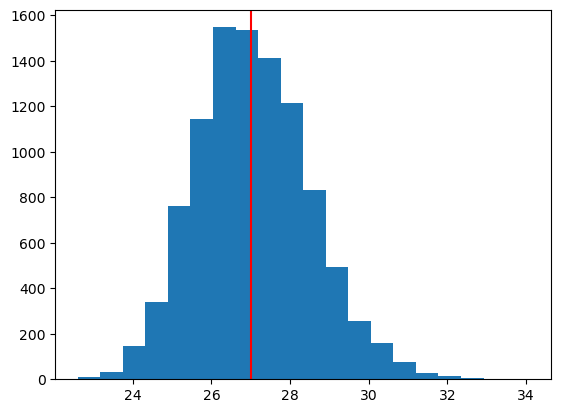

In [4]:
plt.hist(v_mc,bins = 20)
plt.axvline(x = v, color = 'r') #vertical line for exact value
plt.show()

Here, we have created a distribution of the velocity of the racecar utilizing the known uncertainty in the measured quantities. Notice how the value we calculated without the uncertainty is sitting at the mean value. This is expected, since the values we used to calculate the velocity are *in the middle* of the uncertainty interval given. 

If we were to go and measure the velocity of the racecar under these conditions, we would find that the majority of the time, the velocity would be 27 m/s, but we may measure a velocity as high as 33 m/s or as low as 23 m/s.

### Check Your Understanding
1. Why do measurements have uncertainty associated with them? 
2.  Besides the uncertainty with the measurement, are there any other considerations we should be concered with for measured values?

### Tasks
1. Measure a distance of your choosing using an instrument of your choosing ~5 times.  Do you get the same value each time? When making the measurement, what are some ways that you can try to minimize any errors?
2. Thinking about modelling, we often include parameters or constants which are *measured* in some way. As noted above, these will have uncertainty associated with them.  Are there other possible sources of error or uncertainty when modelling?
3. Submit your answers to Q1 and Q2 under Tasks to Canvas. 

**End of Pre-Lecture Material**

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
%matplotlib inline


print("packages imported")

packages imported


### Applied Force Uncertainty Analysis

In groups of 3-4, simulate the uncertainty in the force applied to a wall by throwing a ball against it.  Recall that $F = ma$, where $F$ is force, $m$ is mass, and $a$ is acceleration given by $a = \frac{v}{t}$, with $v$ velocity and $t$ time.  We have the following information about the measurements:

|quantity| value | uncertainty|
|----------|-------------|-----------------|
|mass| 0.055 kg |$\pm 0.001$ kg|
|velocity| 10 m/s |$\pm 0.5$ m/s|
|  time  | 5 s | $\pm 1$ s |


Simulate the uncertainty for $N=10000$ times. 

Determine which parameter is responsible for the largest amount of variance in the acceleration.

In [5]:
# calculate force
m = 0.055
v = 10
t_f = 5

F = m * (v/t_f)


#uncertainty 
m_err = 0.001
v_err = 0.05
t_err_f = 1 

#number of simulations
N = 10000 

#loc is mean, scale is st deviation
m_mc = m + np.random.normal(loc=0.0, scale=m_err,size=N)
v_mc = v + np.random.normal(loc=0.0, scale=v_err,size=N)
t_f_mc = t_f + np.random.normal(loc=0.0, scale=t_err_f,size=N)

F_mc = m_mc*(v_mc/t_f_mc)

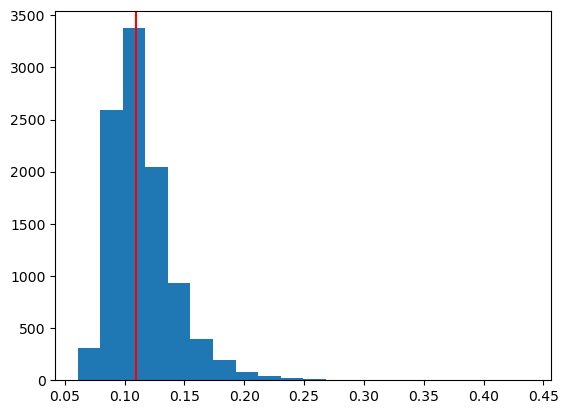

In [6]:
plt.hist(F_mc,bins = 20)
plt.axvline(x = F, color = 'r') #vertical line for exact value
plt.show()

In [7]:
# calculate force
m = 0.055
v = 10
t_f = 5

F = m * (v/t_f)


#uncertainty 
m_err = 0.001
v_err = 0.05
t_err_f = 1 

#number of simulations
N = 10000 

#loc is mean, scale is st deviation
m_mc = m 
v_mc = v 
t_f_mc = t_f + np.random.normal(loc=0.0, scale=t_err_f,size=N)

F_mc = m_mc*(v_mc/t_f_mc)

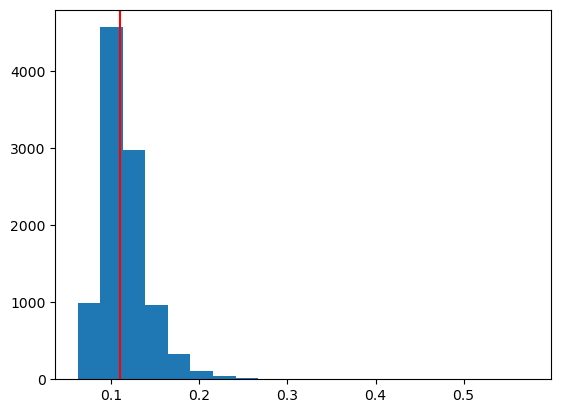

In [8]:
plt.hist(F_mc,bins = 20)
plt.axvline(x = F, color = 'r') #vertical line for exact value
plt.show()

In [9]:
# calculate force
m = 0.055
v = 10
t_f = 5

F = m * (v/t_f)


#uncertainty 
m_err = 0.001
v_err = 0.05
t_err_f = 1 

#number of simulations
N = 10000 

#loc is mean, scale is st deviation
m_mc = m 
v_mc = v + np.random.normal(loc=0.0, scale=v_err,size=N)
t_f_mc = t_f

F_mc = m_mc*(v_mc/t_f_mc)

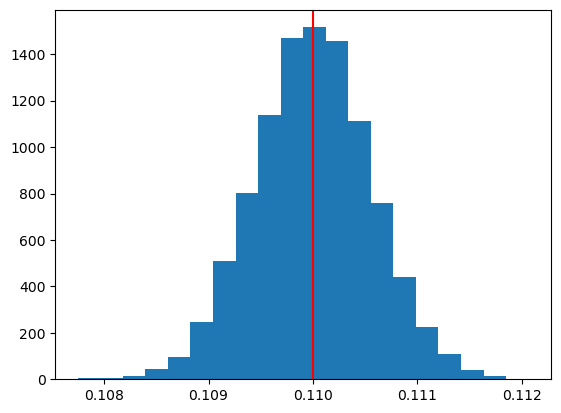

In [10]:
plt.hist(F_mc,bins = 20)
plt.axvline(x = F, color = 'r') #vertical line for exact value
plt.show()

In [11]:
# calculate force
m = 0.055
v = 10
t_f = 5

F = m * (v/t_f)


#uncertainty 
m_err = 0.001
v_err = 0.05
t_err_f = 1 

#number of simulations
N = 10000 

#loc is mean, scale is st deviation
m_mc = m + np.random.normal(loc=0.0, scale=m_err,size=N)
v_mc = v 
t_f_mc = t_f

F_mc = m_mc*(v_mc/t_f_mc)

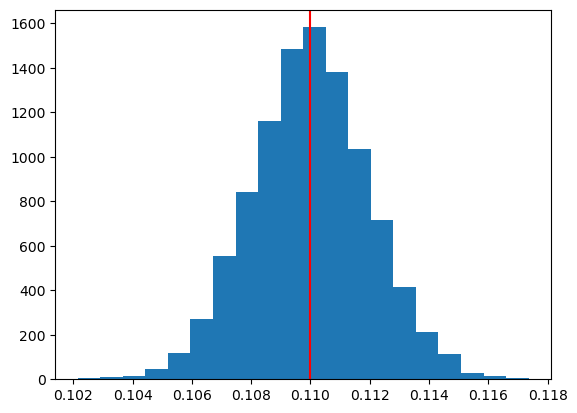

In [12]:
plt.hist(F_mc,bins = 20)
plt.axvline(x = F, color = 'r') #vertical line for exact value
plt.show()

It seems that our measurement for time has the largest effect on the acceleration -- Here we are looking at the "spread" of the horizontal axis of our histograms, where the one with the time perturbation has the largest horizontal range. 

### Application to Deterministic Models

Let's see how measurement uncertainty can affect the solution in deterministic modelling (i.e., differential equations).

We have previously seen the Energy Balance Model when looking at Deterministic Models.  As a reminder, we have 

$$k \frac{dT}{dt} = \pi R^2Q(1-\alpha(T)) - 4 \pi R^2 \sigma \varepsilon T^4,$$

where
- $k$ is the heat capacity of the Earth (J/K)
- $T$ is the temperature of the Earth (K)
- $t$ is the time (s)
- $R$ is the radius of the Earth (m)
- $Q$ is the amount of solar energy that reaches the Earth's surface (s$^{-1}$ m$^{-2}$)
- $\alpha(T)$ is the albedo of the Earth and is unitless
- $\sigma$ is the Stefan-Boltzmann constant (W/(m$^2$K$^4$) ) 
- $\varepsilon$ is the emissivity and is unitless

For the albedo, we had two possible functions (which gave rise to two different Energy Balance Models):
$$\alpha_1(T) = 0.3$$ 
or 
$$\alpha_2(T)=
\begin{cases}
0.7, T \leq 247 K\\
3.52296-0.011429T, 247 < T  < 282 K \\
0.3, T \geq 282 K
\end{cases}$$

We also know the following information about the uncertainty of the constant values:
|Constant| Value|Uncertainty| 
|--------|------|-----------|
|$k$      | $1.0 \times 10^{23}$ J/K| $\pm 0.22 \times 10^{9}$ J/K|
|$R$      | $6.3781 \times 10^6$  m| $\pm 10$ m|
|$Q$      | $1365$    W/(s m$^2$)| $\pm 27.3$ W/(s m$^2$)|
|$\sigma$ | $5.6704 \times 10^{-8}$ W/(m$^2$K$^4$) | $\pm 0.000021 \times 10^{-8}$ W/(m$^2$K$^4$)|

Let's see how to incorporate the uncertainty in to the model and the effects on the solutions.

In [13]:
import scipy.integrate as spi
import scipy.optimize as spo

In [14]:
## Let's look at the energy balance equation with \alpha_1(T) 
eps = 0.622
alpha = 0.3

f = lambda T,t: (np.pi*R**2*Q*(1 - alpha) - 4*np.pi*R**2*eps*sigma*T**4)/k
t = np.linspace(0,1e9,100)

T0 = 267

## generate deterministic solution
Q = 1365 
R = 6.3781e6 
k = 1e23 
sigma = 5.670374419e-8 
T_determin = spi.odeint(f,T0,t)
t_determin = t

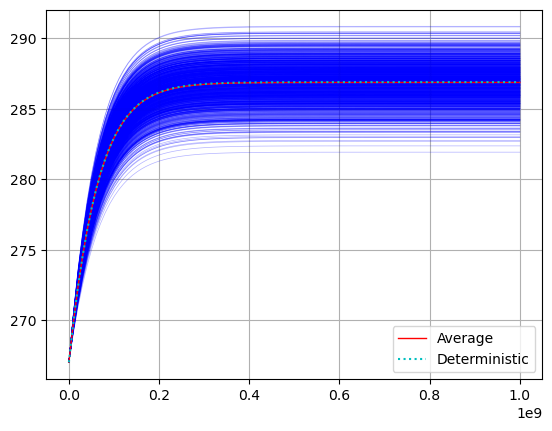

In [15]:
##Uncertainty analysis -- add in the noise to Q, R , K, and sigma
#number of simulations
## this takes a couple of seconds to run
N = 1000 

T_sols = []

for i in range(N):
    Q = 1365 + np.random.normal(loc=0.0, scale=27.3,size=1)
    R = 6.3781e6 + np.random.normal(loc=0.0, scale=10,size=1)
    k = 1e23 + np.random.normal(loc=0.0, scale=0.22e9,size=1)
    sigma = 5.670374419e-8 + np.random.normal(loc=0.0, scale=0.000021e-8,size=1)
    T = spi.odeint(f,T0,t)
    T_sols.append(T)
    plt.plot(t,T,'-b',alpha=0.3,linewidth=0.5)
    
#convert T_sols to array to find mean -- python stores as list, need array
T_average = np.array(T_sols)

plt.plot(t,T_average.mean(axis=0),'r',linewidth=1,label='Average') 
plt.plot(t_determin,T_determin, ':c',linewidth=1.5,label='Deterministic')
plt.legend()
plt.grid(True)
plt.show()

Let's revisualize this plot interms of a probability density function.  For each $x$ value in the plot above, we will want to create a vertical slice.  In each vertical slice, we then want to determine the probability density function.  The idea here being that we want to be able to "track" how probable it is for a certain temperature to exist at each time point. 

In [16]:
## Add some packages to make an animation
from matplotlib.animation import FuncAnimation
import IPython

In [17]:
# Calculate the probability density curves using a Gaussian kernel density
def K(y):
    return 1/(np.sqrt(2*np.pi))*np.exp(-(y)**2/2)

#temperature range is roughly 260 to 300, so choose this as the input domain
x = np.linspace(260,300,300)

Kernel_sols = []
T_sols_1 = np.array(T_sols) #T_sols is a list, but we want an array

for i in range(np.size(T_sols_1,1)):
    T_sol_k = T_sols_1[:,i] #create a vertical slice
    R = np.size(T_sol_k)
    h = 0.3 
    Kernel_fun = 0
    for j in range(R):
        Kernel_fun += K((x-T_sol_k[j])/h)
    Kernel_sols.append(1/((R+1)*h)*Kernel_fun)

In [25]:
### make a test case for one probability curve

T_sols_1 = np.array(T_sols)
T_sol_k = T_sols_1[:,0]
R = np.size(T_sol_k)
h = 0.3
Kernel_fun = 0
for j in range(R):
    Kernel_fun += K((x-T_sol_k[j])/h)

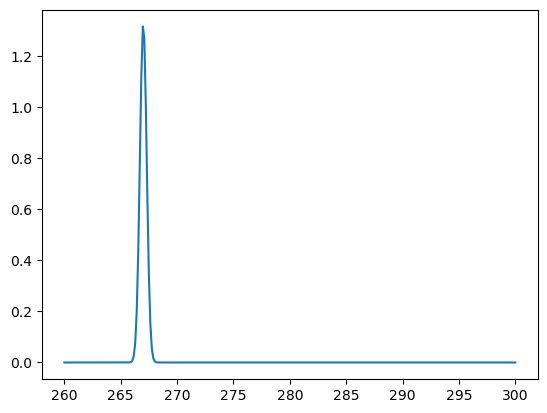

In [26]:
plt.plot(x,1/((R+1)*h)*Kernel_fun)
plt.show()

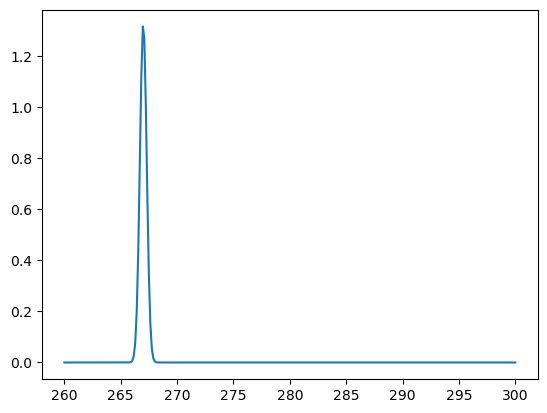

In [24]:
plt.plot(x,Kernel_sols_a[0,:])
plt.show()

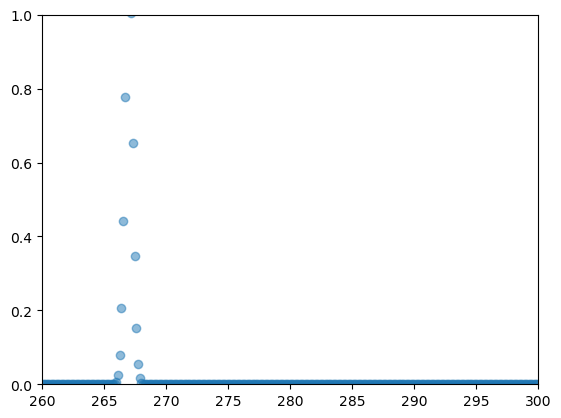

In [18]:
## animate the plot 
Kernel_sols_a = np.array(Kernel_sols) #Kernel_sols is list, want array

fig, ax = plt.subplots()
ax.set(xlim=(260,300), ylim=(0, 1))
scat = ax.scatter(x,Kernel_sols_a[0,:], alpha=0.5)
 
def animate(h):
    x_i = x
    y_i = Kernel_sols_a[h,:]
    scat.set_offsets(np.c_[x_i, y_i])

#def animate(t):
#    plt.plot(x,Kernel_sols[t,:])
#    plt.xlim(0,10)

animation = FuncAnimation(fig, animate, frames=100)
IPython.display.HTML(animation.to_jshtml(fps=4))

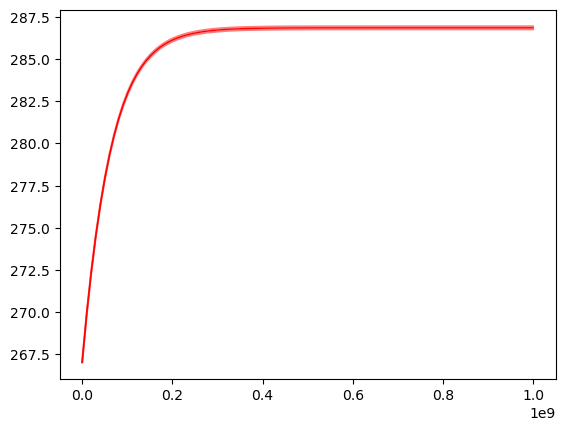

In [ ]:
##### Let's visualize the plot differently

#compute 95% confidence intervals
t_score = 1.96
T_std = T_average.std(axis=0)
Con_int = t_score*T_std/np.sqrt(N)

plt.plot(t, T_average.mean(axis=0), 'r',linewidth=1,label='Average')
plt.plot(t, T_average.mean(axis=0)-Con_int, 'r', alpha=0.5)
plt.plot(t,(T_average.mean(axis=0)+Con_int),'r',alpha=0.5)
plt.show()

In [19]:
#Let's count the number of solutions that end up at the high temp vs the low temp

T_end = T_average[:,-1]

count = 0 
for i in range(N):
    if T_end[i]>285 and T_end[i]<287.5:
        count += 1

print('Number of solutions in CI',count)
print('Number of solutions outside CI',N-count)
print('Percentage of solutions in CI',count/N*100)
print('Percentage of solutions outside CI',(N-count)/N*100)

Number of solutions in CI 549
Number of solutions outside CI 451
Percentage of solutions in CI 54.900000000000006
Percentage of solutions outside CI 45.1


### Energy Balance Model Uncertainty Analysis

In groups of 4-6, add uncertainty to the Energy Balance Model with $\alpha_2(T)$. Use an initial temperature of $267$.  How does the result change when $\alpha_1(T)$ is replaced with $\alpha_2(T)$.

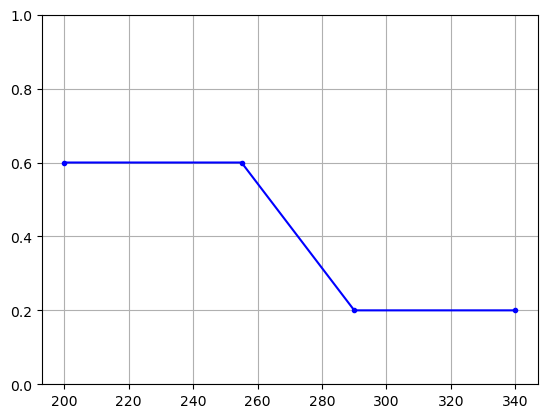

In [20]:
temp = [200,255,290,340]
albedo = [0.6,0.6,0.2,0.2]
plt.plot(temp,albedo,'b.-'), plt.ylim([0,1]), plt.grid(True)
plt.show()

In [21]:
## Deterministic solution
t = np.linspace(0,1e9,100)
alpha = lambda T: np.interp(T,temp,albedo)
f1 = lambda T,t: (np.pi*R**2*Q*(1 - alpha(T)) - 4*np.pi*R**2*eps*sigma*T**4)/k

T0 = 267

## generate deterministic solution
Q = 1365 
R = 6.3781e6 
k = 1e23 
sigma = 5.670374419e-8 
T_determin1 = spi.odeint(f1,T0,t)
t_determin1 = t

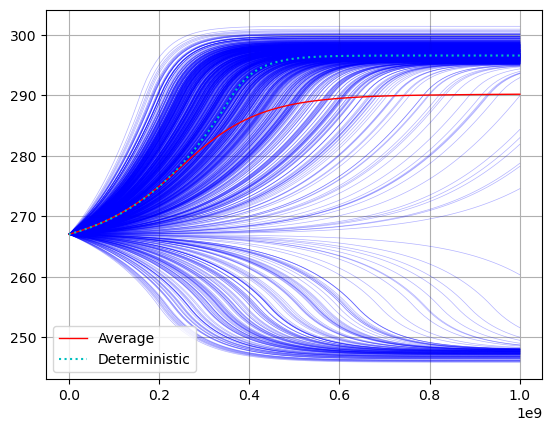

In [22]:
#number of simulations
#This takes about 5s to run with 1000 iterations
N = 1000 

T_sols = []

for i in range(N):
    Q = 1365 + np.random.normal(loc=0.0, scale=27.3,size=1)
    R = 6.3781e6 + np.random.normal(loc=0.0, scale=10,size=1)
    k = 1e23 + np.random.normal(loc=0.0, scale=0.22e9,size=1)
    sigma = 5.670374419e-8 + np.random.normal(loc=0.0, scale=0.000021e-8,size=1)
    T = spi.odeint(f1,T0,t)
    T_sols.append(T)
    plt.plot(t,T,'-b',alpha=0.3,linewidth=0.5)

#convert T_sols to array to find mean -- python stores as list, need array
T_average1 = np.array(T_sols)

plt.plot(t,T_average1.mean(axis=0),'r',linewidth=1,label='Average')
plt.plot(t_determin1,T_determin1, ':c',linewidth=1.5,label='Deterministic')
plt.legend()
plt.grid(True)
plt.show()

Notes:
1. When using the $\alpha_2(T)$ function, we see that the uncertainty associated with the measurements has more effect.
2. When we looked at the Energy Balance Model initially, when using $\alpha_2(T)$, we saw that there were $2$ equilibriums when looking at a range of initial $T_0$ values. Interestingly, we see the same type of behaviour here.  The upper bound of $~300$ is preferred, however, we see a nonnegligble number of solutions going down to the lower temperature.
3. The uncertainty with the parameters here appear to have a lot of influence on the Energy Balance Model with $\alpha_2(T)$ used.  Some considerations for improving the model to be less sensitive to these measurements may be needed to achieve good predictions.

In [23]:
#Let's count the number of solutions that end up at the high temp vs the low temp

T_end = T_average1[:,-1]

count = 0 
for i in range(N):
    if T_end[i]>T0:
        count += 1

print('Number of solutions in higher temperature',count)
print('Number of solutions in lower temperature',N-count)
print('Percentage of solutions in higher temperature',count/N*100)
print('Percentage of solutions in lower temperature',(N-count)/N*100)

Number of solutions in higher temperature 865
Number of solutions in lower temperature 135
Percentage of solutions in higher temperature 86.5
Percentage of solutions in lower temperature 13.5


In [24]:
## Again, let's track the probability distribution of the temperature at each time point.  
## We can resuse the same code from above for this!

#output temperature range is approx 240 to 310, so adjust range of interest
x = np.linspace(240,310,300)

Kernel_sols = []
T_sols_1 = np.array(T_sols) #T_sols is a list, want array

for i in range(np.size(T_sols_1,1)):
    T_sol_k = T_sols_1[:,i]
    R = np.size(T_sol_k)
    h = 0.3
    Kernel_fun = 0
    for j in range(R):
        Kernel_fun += K((x-T_sol_k[j])/h)
    Kernel_sols.append(1/((R+1)*h)*Kernel_fun)

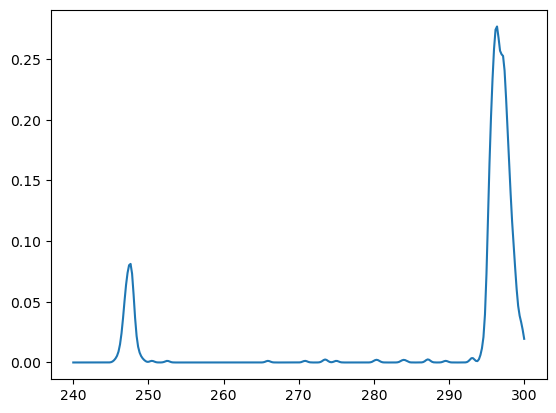

In [37]:
Kernel_sols_a = np.array(Kernel_sols)
plt.plot(x,Kernel_sols_a[99,:])
plt.show()

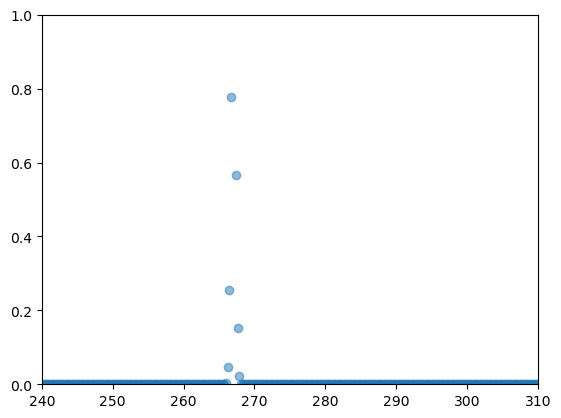

In [25]:
## animate the plot
Kernel_sols_a = np.array(Kernel_sols)

fig, ax = plt.subplots()
ax.set(xlim=(240,310), ylim=(0, 1))
scat = ax.scatter(x,Kernel_sols_a[0,:], alpha=0.5)
 
def animate(h):
    x_i = x
    y_i = Kernel_sols_a[h,:]
    scat.set_offsets(np.c_[x_i, y_i])

#def animate(t):
#    plt.plot(x,Kernel_sols[t,:])
#    plt.xlim(0,10)

animation = FuncAnimation(fig, animate, frames=100)
IPython.display.HTML(animation.to_jshtml(fps=4))

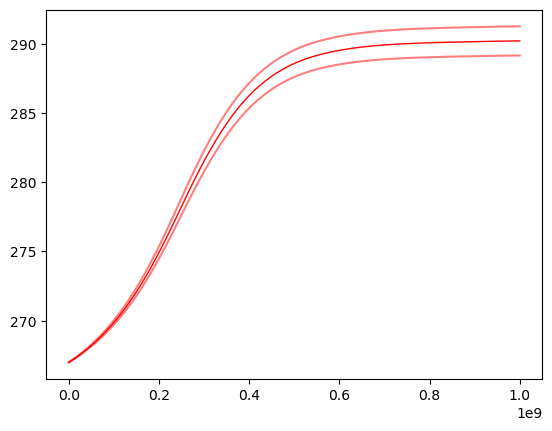

In [26]:
## Let's visualize the plot differently

#compute 95% confidence intervals
t_score = 1.96
T_std = T_average1.std(axis=0)
Con_int = t_score*T_std/np.sqrt(N)

plt.plot(t, T_average1.mean(axis=0), 'r',linewidth=1,label='Average')
plt.plot(t, T_average1.mean(axis=0)-Con_int, 'r', alpha=0.5)
plt.plot(t,(T_average1.mean(axis=0)+Con_int),'r',alpha=0.5)
plt.show()

Let's try to determine which parameter(s) value is contributing to the variance we see.  In this case, we will run the Monte Carlo simulation with only one parameter's error included at a time, so that we can see how each parameter "controls" the solution.

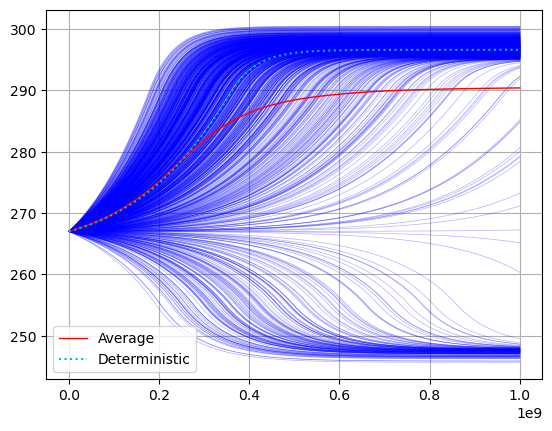

In [27]:
#number of simulations
N = 1000 

T_sols_Q = []

for i in range(N):
    Q = 1365 + np.random.normal(loc=0.0, scale=27.3,size=1)
    R = 6.3781e6
    k = 1e23
    sigma = 5.670374419e-8
    T = spi.odeint(f1,T0,t)
    T_sols_Q.append(T)
    plt.plot(t,T,'-b',alpha=0.3,linewidth=0.5)

#convert T_sols to array to find mean -- python stores as list, need array
T_average1 = np.array(T_sols_Q)

plt.plot(t,T_average1.mean(axis=0),'r',linewidth=1,label='Average')
plt.plot(t_determin1,T_determin1, ':c',linewidth=1.5,label='Deterministic')
plt.legend()
plt.grid(True)
plt.show()

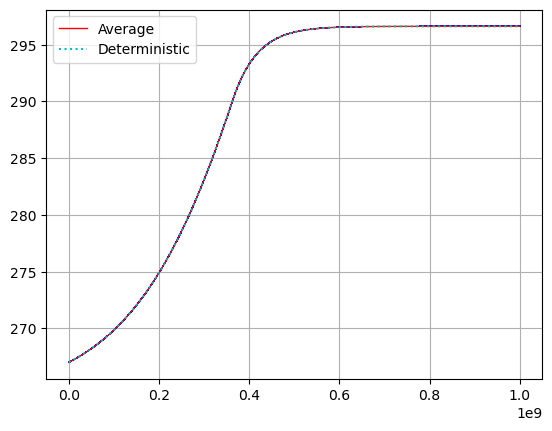

In [28]:
#number of simulations
N = 1000 

T_sols_R = []

for i in range(N):
    Q = 1365
    R = 6.3781e6 + np.random.normal(loc=0.0, scale=10,size=1)
    k = 1e23
    sigma = 5.670374419e-8
    T = spi.odeint(f1,T0,t)
    T_sols_R.append(T)
    plt.plot(t,T,'-b',alpha=0.3,linewidth=0.5)

#convert T_sols to array to find mean -- python stores as list, need array
T_average1 = np.array(T_sols_R)

plt.plot(t,T_average1.mean(axis=0),'r',linewidth=1,label='Average')
plt.plot(t_determin1,T_determin1, ':c',linewidth=1.5,label='Deterministic')
plt.legend()
plt.grid(True)
plt.show()

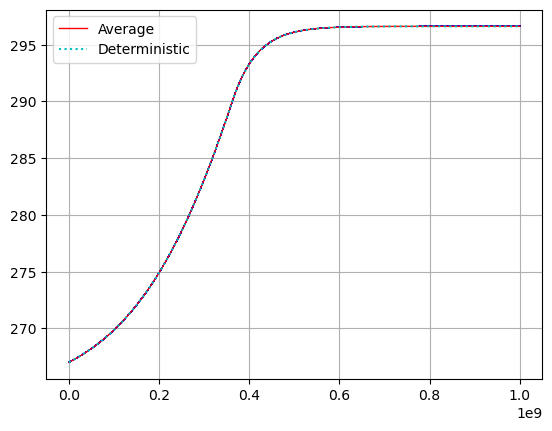

In [29]:
#number of simulations
N = 1000 

T_sols_k = []

for i in range(N):
    Q = 1365
    R = 6.3781e6 
    k = 1e23 + np.random.normal(loc=0.0, scale=0.22e9,size=1)
    sigma = 5.670374419e-8 
    T = spi.odeint(f1,T0,t)
    T_sols_k.append(T)
    plt.plot(t,T,'-b',alpha=0.3,linewidth=0.5)

#convert T_sols to array to find mean -- python stores as list, need array
T_average1 = np.array(T_sols_k)

plt.plot(t,T_average1.mean(axis=0),'r',linewidth=1,label='Average')
plt.plot(t_determin1,T_determin1, ':c',linewidth=1.5,label='Deterministic')
plt.legend()
plt.grid(True)
plt.show()

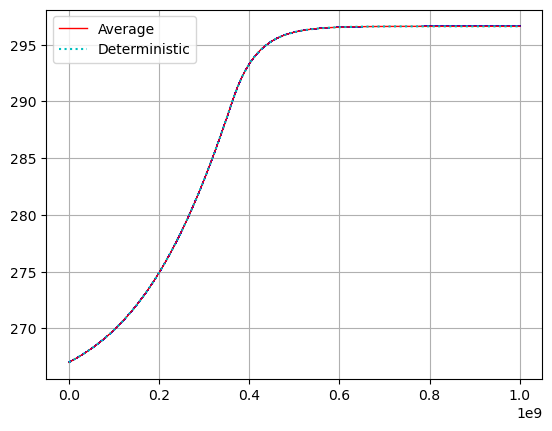

In [30]:
#number of simulations
N = 1000 

T_sols_sig = []

for i in range(N):
    Q = 1365 
    R = 6.3781e6 
    k = 1e23
    sigma = 5.670374419e-8 + np.random.normal(loc=0.0, scale=0.000021e-8,size=1)
    T = spi.odeint(f1,T0,t)
    T_sols_sig.append(T)
    plt.plot(t,T,'-b',alpha=0.3,linewidth=0.5)

#convert T_sols to array to find mean -- python stores as list, need array
T_average1 = np.array(T_sols_sig)

plt.plot(t,T_average1.mean(axis=0),'r',linewidth=1,label='Average')
plt.plot(t_determin1,T_determin1, ':c',linewidth=1.5,label='Deterministic')
plt.legend()
plt.grid(True)
plt.show()

It appears that $Q$, the amount of solar energy that reaches the Earth's surface, is responsible for the variation we are seeing in our Monte Carlo simulation, and can heavily affect the outcome of the results. 

When thinking about this model, we may want to determine a more accurate measurement of $Q$ or a more accurate method for computing the value of $Q$.  Alternatively, we may want to make $Q$ a function of position on the Earth to account for the Earth's tilt and rotation.  The latter would make the model more complex, which in turn makes it more time consuming to solve. 

### Energy Balance Model Uncertainty Analysis 2

In groups of 4-6, add uncertainty to the Energy Balance Model's initial temperature using $\alpha_2(T)$.  For this task use $267 \pm 1$ K  How does the result change as the uncertainty is increased?

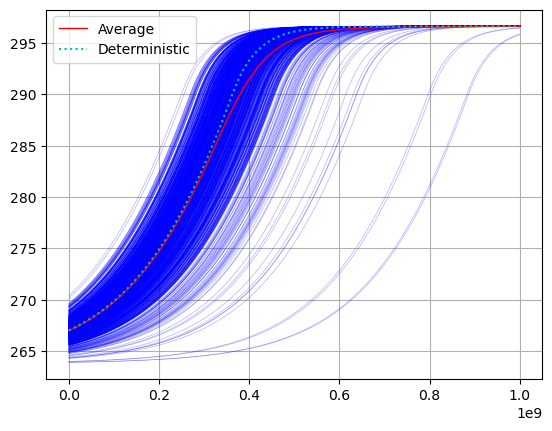

In [31]:
## Deterministic solution
eps = 0.622
Q = 1365 
R = 6.3781e6 
k = 1e23 
sigma = 5.670374419e-8 


t = np.linspace(0,1e9,100)
alpha = lambda T: np.interp(T,temp,albedo)
f1 = lambda T,t: (np.pi*R**2*Q*(1 - alpha(T)) - 4*np.pi*R**2*eps*sigma*T**4)/k

T0 = 267

## generate deterministic solution
T_determin1 = spi.odeint(f1,T0,t)
t_determin1 = t

#number of simulations
N = 1000 

T_sols_a2 = []
Q = 1365
R = 6.3781e6
k = 1e23
sigma = 5.670374419e-8
for i in range(N):
    T0=267 + np.random.normal(loc=0.0, scale=1,size=1)
    T = spi.odeint(f1,T0,t)
    T_sols_a2.append(T)
    plt.plot(t,T,'-b',alpha=0.3,linewidth=0.5)

#convert T_sols to array to find mean -- python stores as list, need array
T_average1 = np.array(T_sols_a2)

plt.plot(t,T_average1.mean(axis=0),'r',linewidth=1,label='Average')
plt.plot(t_determin1,T_determin1, ':c',linewidth=1.5,label='Deterministic')
plt.legend()
plt.grid(True)
plt.show()

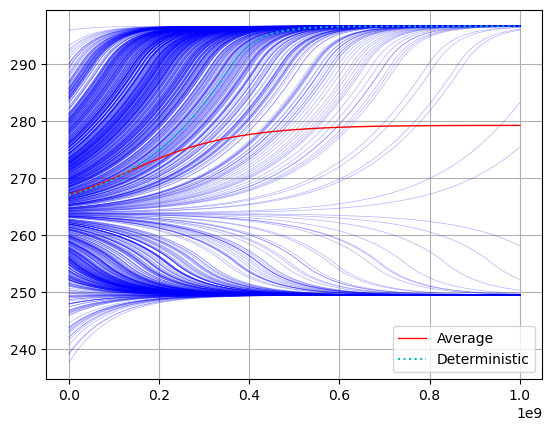

In [32]:
#number of simulations
N = 1000 

T_sols_a2_T1 = []
Q = 1365
R = 6.3781e6
k = 1e23
sigma = 5.670374419e-8
for i in range(N):
    T0=267 + np.random.normal(loc=0.0, scale=10,size=1)
    T = spi.odeint(f1,T0,t)
    T_sols_a2_T1.append(T)
    plt.plot(t,T,'-b',alpha=0.3,linewidth=0.5)

#convert T_sols to array to find mean -- python stores as list, need array
T_average1 = np.array(T_sols_a2_T1)

plt.plot(t,T_average1.mean(axis=0),'r',linewidth=1,label='Average')
plt.plot(t_determin1,T_determin1, ':c',linewidth=1.5,label='Deterministic')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
## Again, let's track the probability distribution of the temperature at each time point.  
## We can resuse the same code from above for this!

#output temperature range is approx 230 to 300, so adjust range of interest
x = np.linspace(230,300,300)

Kernel_sols = []
T_sols_1 = np.array(T_sols_a2_T1) #T_sols_a2_T1 is a list, want array

for i in range(np.size(T_sols_1,1)):
    T_sol_k = T_sols_1[:,i]
    R = np.size(T_sol_k)
    h = 0.3
    Kernel_fun = 0
    for j in range(R):
        Kernel_fun += K((x-T_sol_k[j])/h)
    Kernel_sols.append(1/((R+1)*h)*Kernel_fun)

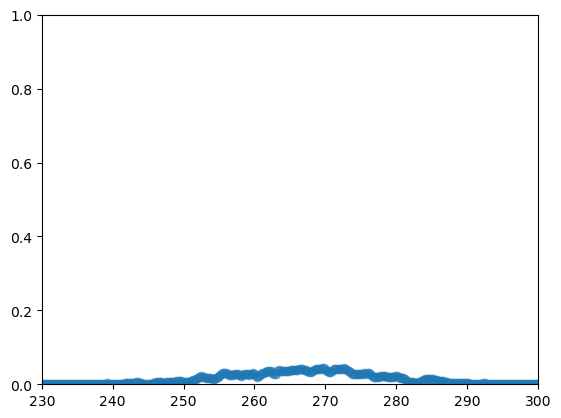

In [34]:
## animate the plot
Kernel_sols_a = np.array(Kernel_sols)

fig, ax = plt.subplots()
ax.set(xlim=(230,300), ylim=(0, 1))
scat = ax.scatter(x,Kernel_sols_a[0,:], alpha=0.5)
 
def animate(h):
    x_i = x
    y_i = Kernel_sols_a[h,:]
    scat.set_offsets(np.c_[x_i, y_i])

#def animate(t):
#    plt.plot(x,Kernel_sols[t,:])
#    plt.xlim(0,10)

animation = FuncAnimation(fig, animate, frames=100)
IPython.display.HTML(animation.to_jshtml(fps=4))